In [118]:
import params
from google.cloud import datastore, storage, logging
import time
import pickle
import hashlib
import sys
import time
import multiprocessing as mp
import sys
import dataAck
import curveTreeDB

def getValidModelsByTicker(db, ticker):
    while True:
        try:
            datastore_client = datastore.Client('money-maker-1236')
            query = datastore_client.query(kind=db)
            
            query.add_filter("ticker", '=', ticker)
            query.add_filter("IS_SHARPE DIFFERENCE SLIPPAGE", '>', 0.0)
            retrievedModels = list(query.fetch())
            return retrievedModels
        except:
            print("DATA SOURCE RETRIEVAL ERROR:", str(sys.exc_info()))
            return 


In [123]:
allValidModels = getValidModelsByTicker(params.curveModels, "USO")

In [124]:
for mod in allValidModels:
    print(mod["IS_BETA"])

0.03602494594393308
0.03381343852862527
0.17299892247645104
0.004132610624171433
0.08454200280635296
0.04263454955294251
0.21253059214909473
0.039877225904265096
0.05780138816380855
0.005632236768369174
0.15007439631435018
0.0243042649479811
0.031899716915252466
0.08460094535823164
0.10488254406577452
0.10193963258108403
0.2041828779420946
0.11310271465827866
0.0018939771325834369
0.08655612745601787
0.03284382018322381
0.06914924548355196
0.11284815228822691
0.04850718218337857
0.035197414531290494
0.055170255976175794
0.006308624366782132
0.12358029816369671
0.07712635451809875
0.020350262960266277
0.04687304172364988
0.0916865452458474
0.03729517492654177
0.05115082695674998
0.021770872669265796
0.0017642912243748124
0.05713631423931162
0.013583332879949313
0.03736783402280463
0.03235109147865025
0.023735221131231277
0.12846502693033277
0.09188151187847317
0.14669431117541992
0.18974020326697083
0.04323364158947094
0.06844677717849912
0.09881555270254513
0.02811591282130351
0.061801

In [153]:
import params
import curveTreeDB
allModels = curveTreeDB.getValidModels(params.treeModels, returnEntireObject = True)

In [154]:
import pandas as pd
cleanedModels = []
seenTickers = {}
for item in allModels:
#     del item["model"]
    try:
        del item["series"]
    except:
        pass
    try:
        print(item["IS_PROFITABILITY"], item["lastXDays"], item["IS_BETA"], item["OOS_BETA"])
    except:
        continue
#     if item["IS_SHARPE DIFFERENCE SLIPPAGE"] < 0.0:
#         continue
    
#     del item["ticker"]
    if item["IS_BETA"] > 0.3 or item["IS_PROFITABILITY SLIPPAGE"] < 0.51:
        continue
    if item["ticker"] not in seenTickers:
        seenTickers[item["ticker"]] = 0
    seenTickers[item["ticker"]] += 1
    itemKeys= list(item.keys())
    for key in itemKeys:
        if key.startswith("OOS") and key != "OOS_PROFITABILITY" and key != "OOS_SHARPE DIFFERENCE SLIPPAGE":
            del item[key]
    cleanedModels.append(item)
print(seenTickers)


{}


In [ ]:
len(cleanedModels)

IS_25TH PERCENTILE RELATIVE SHARPE DIFFERENCE OOS_PROFITABILITY


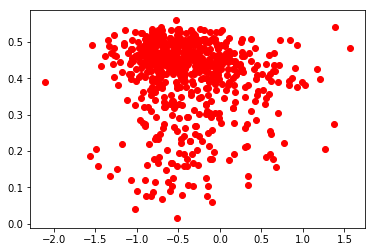

IS_25TH PERCENTILE RELATIVE SHARPE DIFFERENCE OOS_SHARPE DIFFERENCE SLIPPAGE


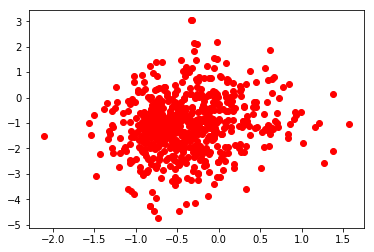

IS_25TH PERCENTILE SHARPE OOS_PROFITABILITY


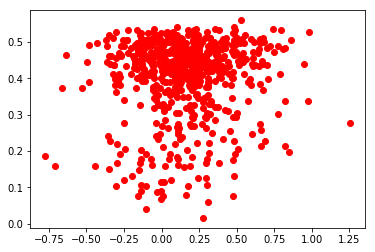

IS_25TH PERCENTILE SHARPE OOS_SHARPE DIFFERENCE SLIPPAGE


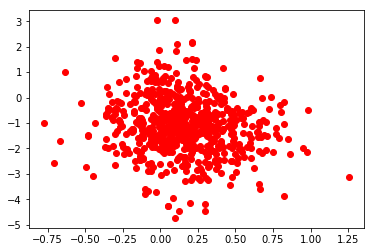

IS_25TH PERCENTILE SHARPE DIFFERENCE OOS_PROFITABILITY


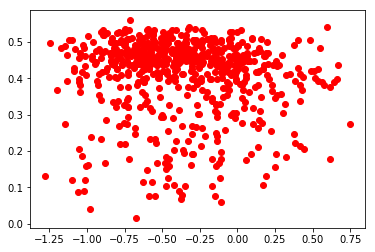

IS_25TH PERCENTILE SHARPE DIFFERENCE OOS_SHARPE DIFFERENCE SLIPPAGE


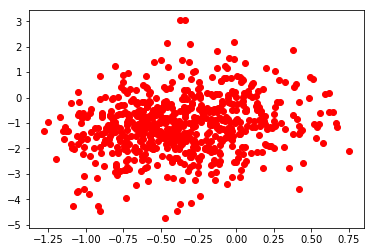

IS_ACTIVE PROFITABILITY OOS_PROFITABILITY


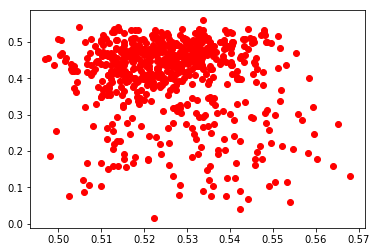

IS_ACTIVE PROFITABILITY OOS_SHARPE DIFFERENCE SLIPPAGE


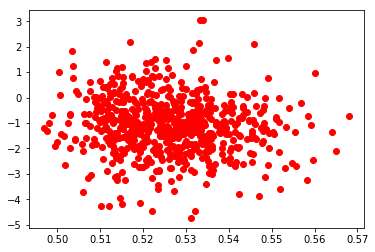

IS_ACTIVE PROFITABILITY SLIPPAGE OOS_PROFITABILITY


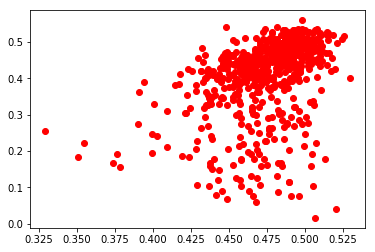

IS_ACTIVE PROFITABILITY SLIPPAGE OOS_SHARPE DIFFERENCE SLIPPAGE


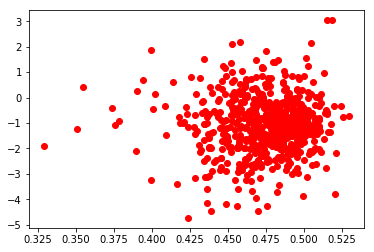

IS_ACTIVITY OOS_PROFITABILITY


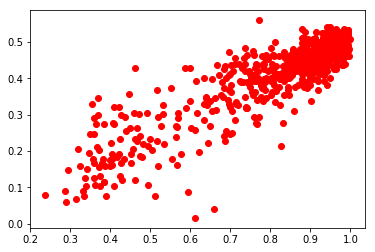

IS_ACTIVITY OOS_SHARPE DIFFERENCE SLIPPAGE


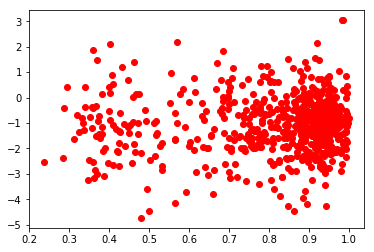

IS_ALPHA OOS_PROFITABILITY


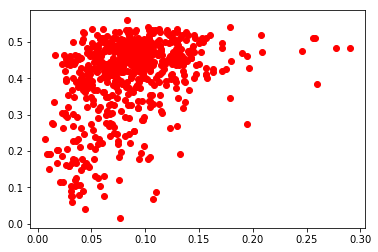

IS_ALPHA OOS_SHARPE DIFFERENCE SLIPPAGE


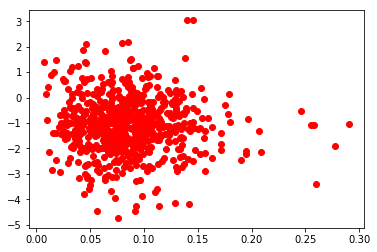

IS_ALPHA SLIPPAGE OOS_PROFITABILITY


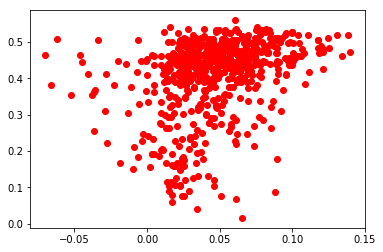

IS_ALPHA SLIPPAGE OOS_SHARPE DIFFERENCE SLIPPAGE


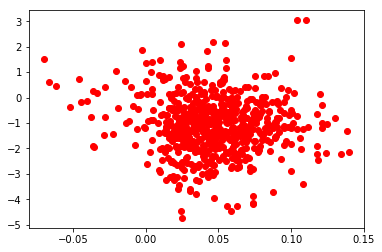

IS_ANNUALIZED RETURN OOS_PROFITABILITY


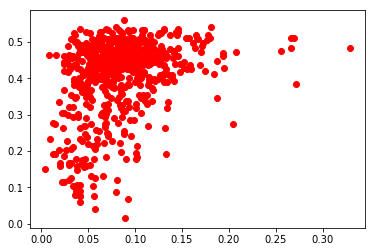

IS_ANNUALIZED RETURN OOS_SHARPE DIFFERENCE SLIPPAGE


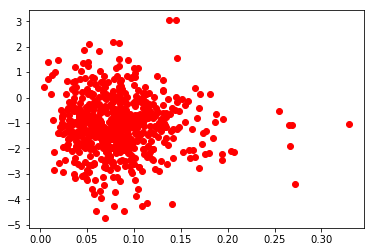

IS_BETA OOS_PROFITABILITY


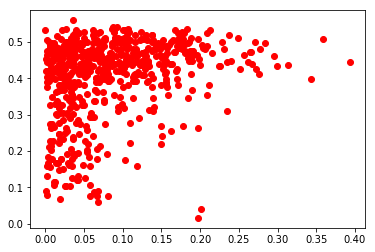

IS_BETA OOS_SHARPE DIFFERENCE SLIPPAGE


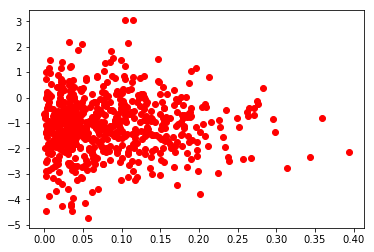

IS_EXTREME STABILITY OOS_PROFITABILITY


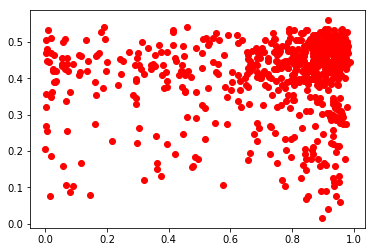

IS_EXTREME STABILITY OOS_SHARPE DIFFERENCE SLIPPAGE


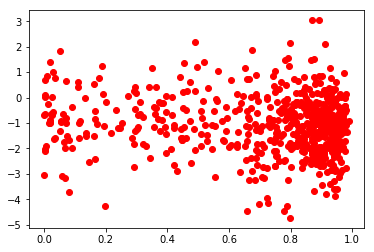

IS_EXTREME STABILITY ROLLING 600 OOS_PROFITABILITY


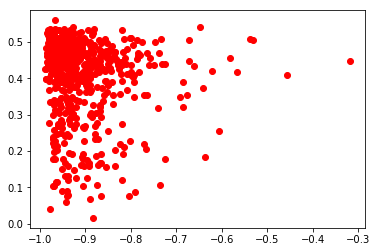

IS_EXTREME STABILITY ROLLING 600 OOS_SHARPE DIFFERENCE SLIPPAGE


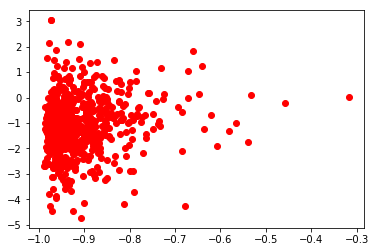

IS_FACTOR SHARPE OOS_PROFITABILITY


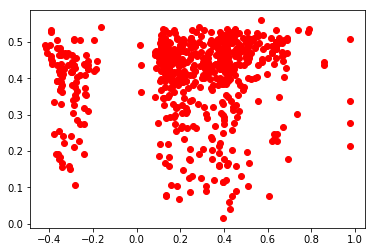

IS_FACTOR SHARPE OOS_SHARPE DIFFERENCE SLIPPAGE


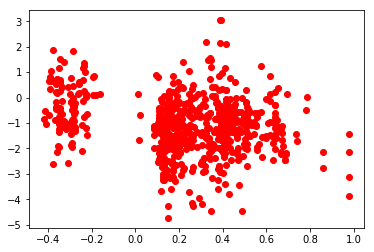

IS_MIN ROLLING SHARPE OOS_PROFITABILITY


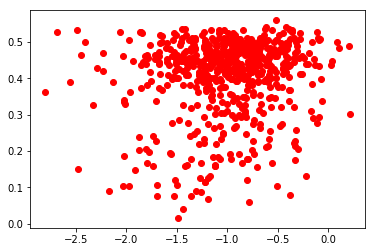

IS_MIN ROLLING SHARPE OOS_SHARPE DIFFERENCE SLIPPAGE


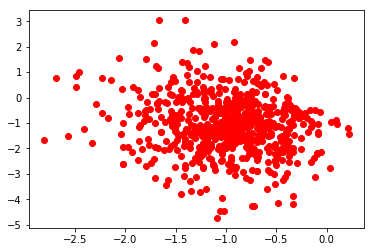

IS_ONE STD SHARPE OOS_PROFITABILITY


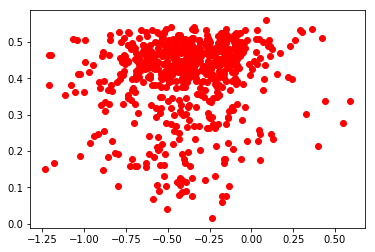

IS_ONE STD SHARPE OOS_SHARPE DIFFERENCE SLIPPAGE


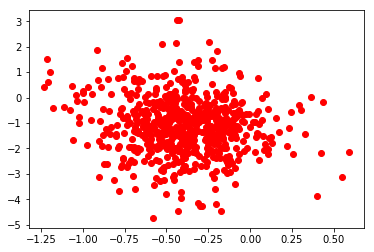

IS_PROFITABILITY OOS_PROFITABILITY


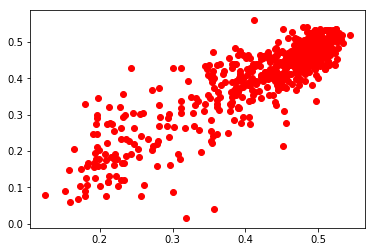

IS_PROFITABILITY OOS_SHARPE DIFFERENCE SLIPPAGE


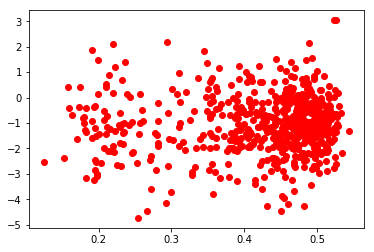

IS_PROFITABILITY SLIPPAGE OOS_PROFITABILITY


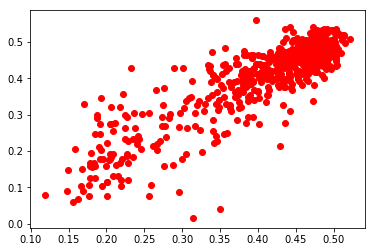

IS_PROFITABILITY SLIPPAGE OOS_SHARPE DIFFERENCE SLIPPAGE


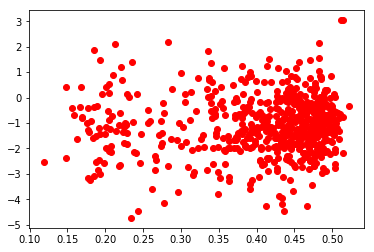

IS_RAW BETA OOS_PROFITABILITY


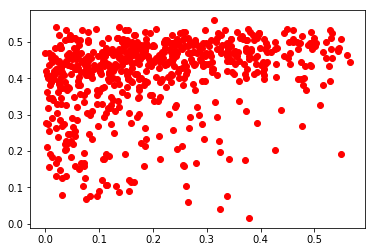

IS_RAW BETA OOS_SHARPE DIFFERENCE SLIPPAGE


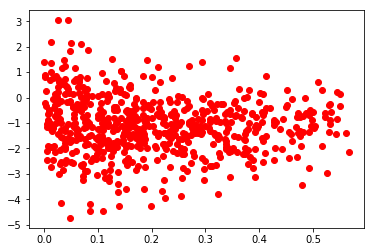

IS_RELATIVE SHARPE OOS_PROFITABILITY


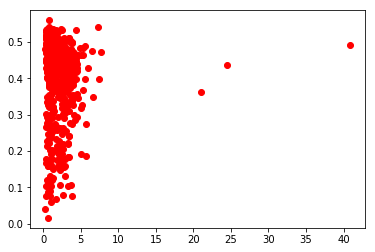

IS_RELATIVE SHARPE OOS_SHARPE DIFFERENCE SLIPPAGE


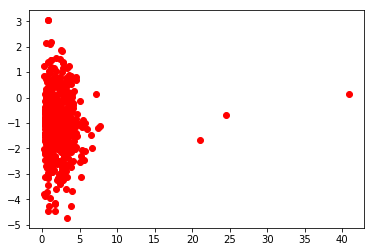

IS_RELATIVE SHARPE DIFFERENCE AVERAGE OOS_PROFITABILITY


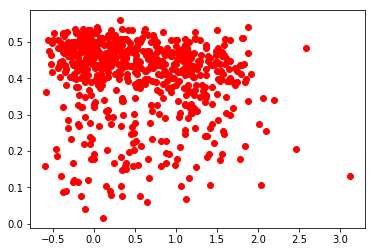

IS_RELATIVE SHARPE DIFFERENCE AVERAGE OOS_SHARPE DIFFERENCE SLIPPAGE


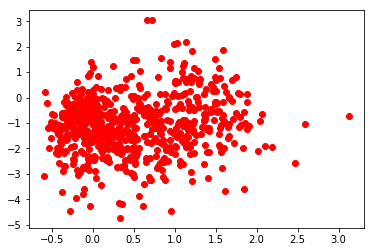

IS_RELATIVE SHARPE DIFFERENCE GREATER THAN 0 OOS_PROFITABILITY


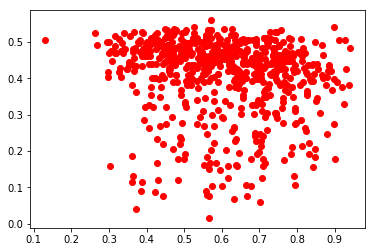

IS_RELATIVE SHARPE DIFFERENCE GREATER THAN 0 OOS_SHARPE DIFFERENCE SLIPPAGE


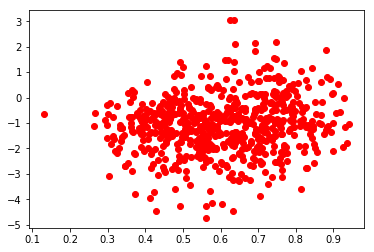

IS_RELATIVE SHARPE DIFFERENCE MIN OOS_PROFITABILITY


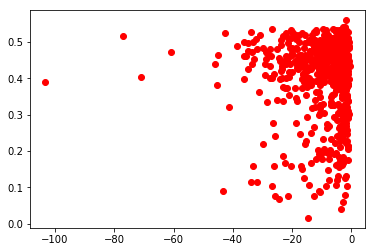

IS_RELATIVE SHARPE DIFFERENCE MIN OOS_SHARPE DIFFERENCE SLIPPAGE


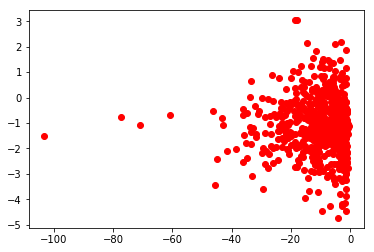

IS_RELATIVE SHARPE SLIPPAGE OOS_PROFITABILITY


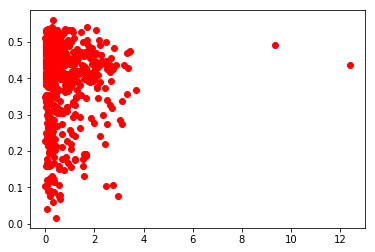

IS_RELATIVE SHARPE SLIPPAGE OOS_SHARPE DIFFERENCE SLIPPAGE


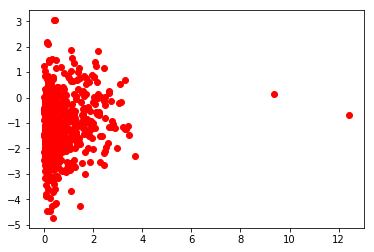

IS_ROLLING SHARPE BETA OOS_PROFITABILITY


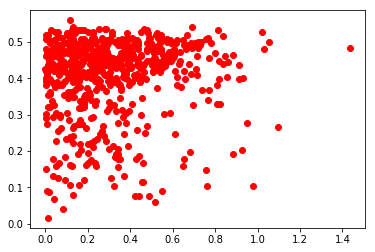

IS_ROLLING SHARPE BETA OOS_SHARPE DIFFERENCE SLIPPAGE


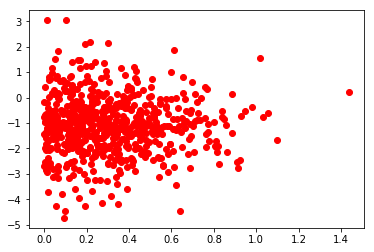

IS_ROLLING SHARPE ERROR OOS_PROFITABILITY


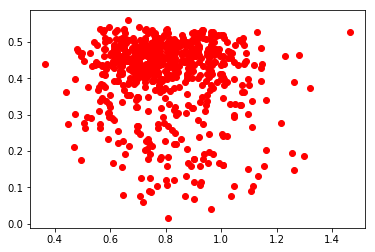

IS_ROLLING SHARPE ERROR OOS_SHARPE DIFFERENCE SLIPPAGE


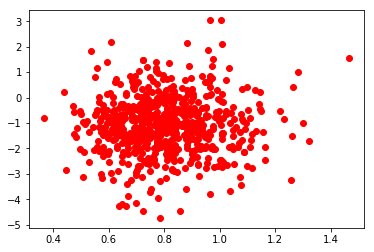

IS_ROLLING SHARPE STABILITY OOS_PROFITABILITY


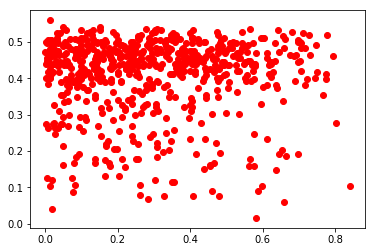

IS_ROLLING SHARPE STABILITY OOS_SHARPE DIFFERENCE SLIPPAGE


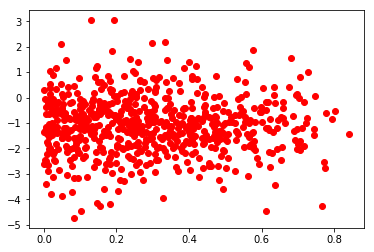

IS_SHARPE OOS_PROFITABILITY


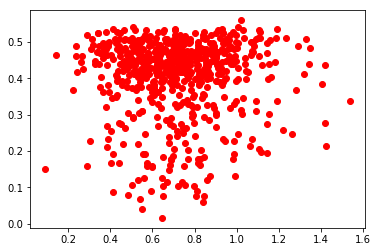

IS_SHARPE OOS_SHARPE DIFFERENCE SLIPPAGE


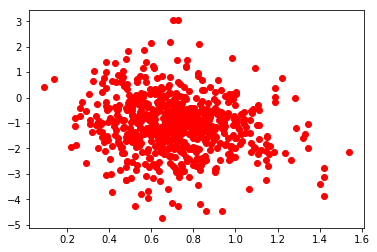

IS_SHARPE DIFFERENCE OOS_PROFITABILITY


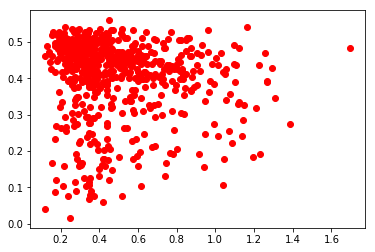

IS_SHARPE DIFFERENCE OOS_SHARPE DIFFERENCE SLIPPAGE


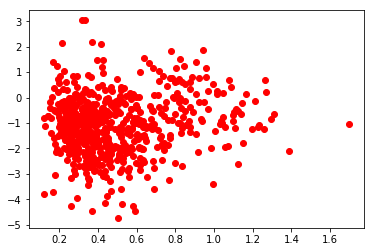

IS_SHARPE DIFFERENCE AVERAGE OOS_PROFITABILITY


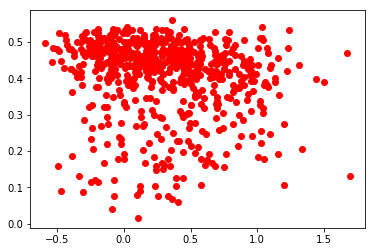

IS_SHARPE DIFFERENCE AVERAGE OOS_SHARPE DIFFERENCE SLIPPAGE


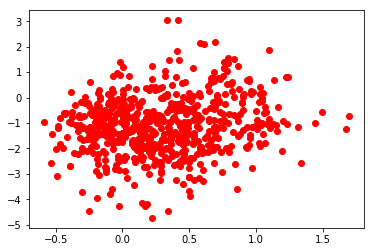

IS_SHARPE DIFFERENCE GREATER THAN 0 OOS_PROFITABILITY


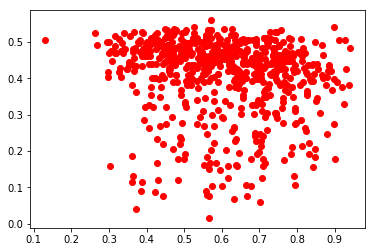

IS_SHARPE DIFFERENCE GREATER THAN 0 OOS_SHARPE DIFFERENCE SLIPPAGE


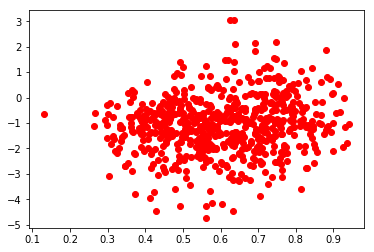

IS_SHARPE DIFFERENCE MIN OOS_PROFITABILITY


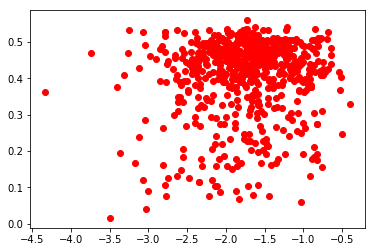

IS_SHARPE DIFFERENCE MIN OOS_SHARPE DIFFERENCE SLIPPAGE


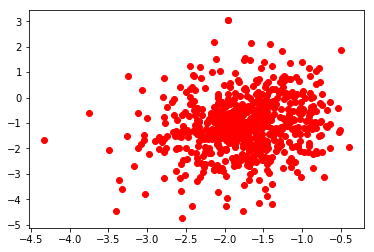

IS_SHARPE DIFFERENCE SLIPPAGE OOS_PROFITABILITY


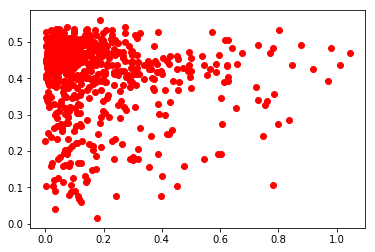

IS_SHARPE DIFFERENCE SLIPPAGE OOS_SHARPE DIFFERENCE SLIPPAGE


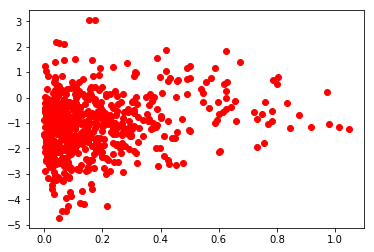

IS_SHARPE SLIPPAGE OOS_PROFITABILITY


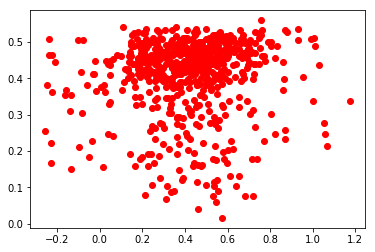

IS_SHARPE SLIPPAGE OOS_SHARPE DIFFERENCE SLIPPAGE


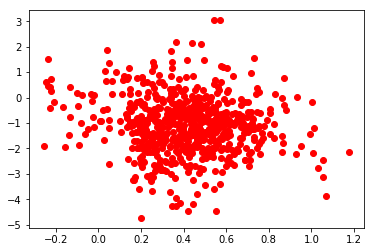

IS_SHARPE SLIPPAGE DECAY OOS_PROFITABILITY


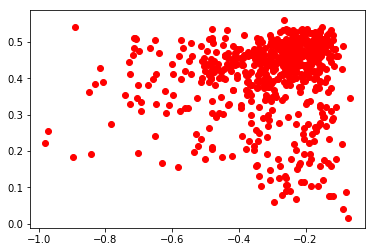

IS_SHARPE SLIPPAGE DECAY OOS_SHARPE DIFFERENCE SLIPPAGE


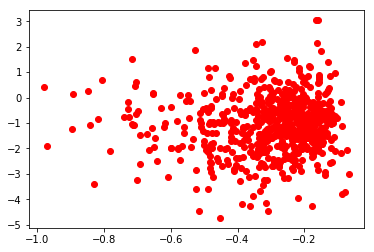

IS_SMART INFORMATION RATIO OOS_PROFITABILITY


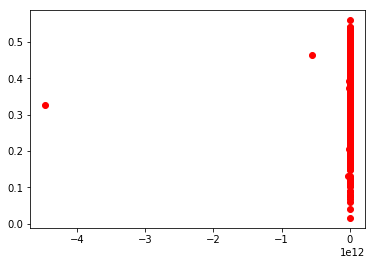

IS_SMART INFORMATION RATIO OOS_SHARPE DIFFERENCE SLIPPAGE


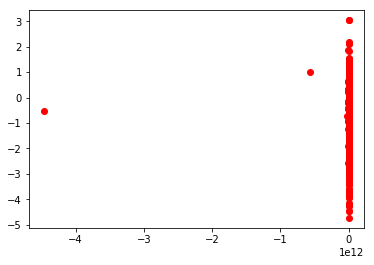

IS_STABILITY OOS_PROFITABILITY


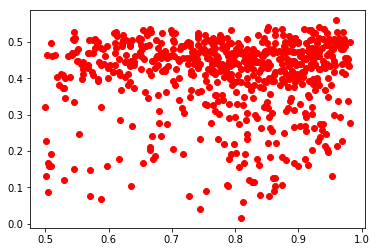

IS_STABILITY OOS_SHARPE DIFFERENCE SLIPPAGE


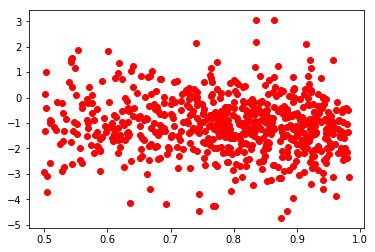

IS_TOTAL DAYS SEEN OOS_PROFITABILITY


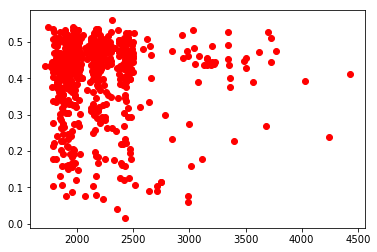

IS_TOTAL DAYS SEEN OOS_SHARPE DIFFERENCE SLIPPAGE


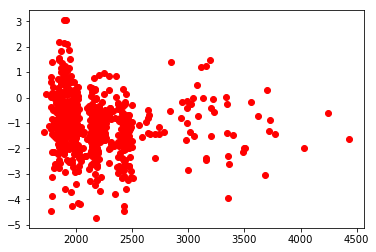

IS_TREYNOR OOS_PROFITABILITY


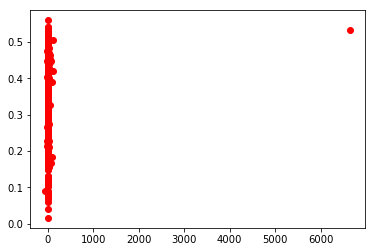

IS_TREYNOR OOS_SHARPE DIFFERENCE SLIPPAGE


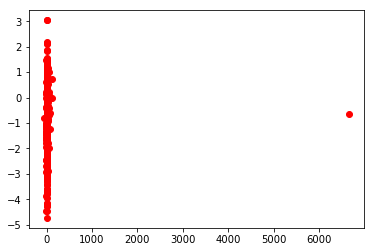

OOS_PROFITABILITY OOS_PROFITABILITY


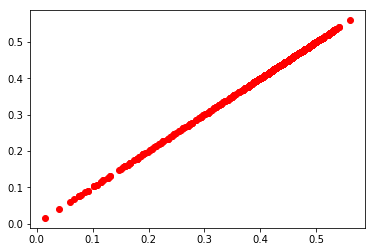

OOS_PROFITABILITY OOS_SHARPE DIFFERENCE SLIPPAGE


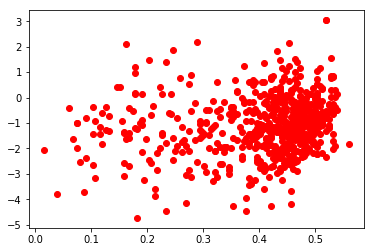

OOS_SHARPE DIFFERENCE SLIPPAGE OOS_PROFITABILITY


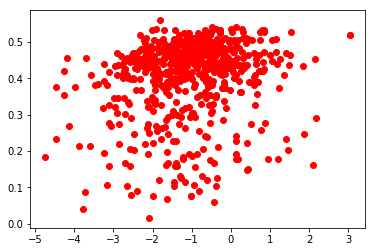

OOS_SHARPE DIFFERENCE SLIPPAGE OOS_SHARPE DIFFERENCE SLIPPAGE


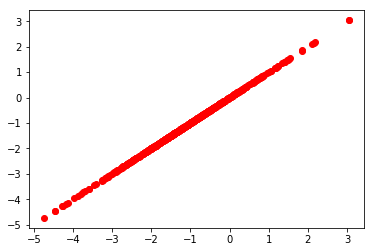

lastXDays
0      0.376984
50     0.430659
100    0.404762
150    0.408142
252    0.424603
350    0.374707
500    0.382486
600    0.395980
Name: OOS_PROFITABILITY, dtype: float64
lastXDays
0     -1.008074
50    -1.321722
100   -0.990598
150   -0.941093
252   -1.120996
350   -1.083756
500   -1.026354
600   -0.920951
Name: OOS_SHARPE DIFFERENCE SLIPPAGE, dtype: float64
lastXDays OOS_PROFITABILITY


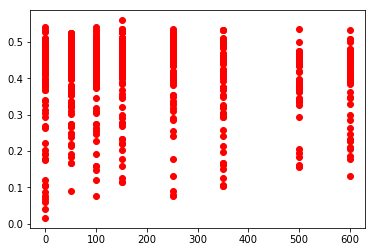

lastXDays OOS_SHARPE DIFFERENCE SLIPPAGE


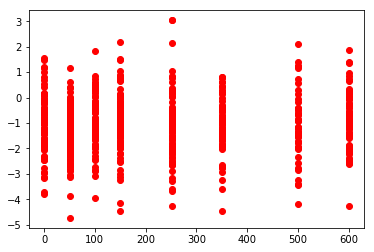

lookbackDistance
5     0.386283
10    0.411807
22    0.421654
44    0.392531
Name: OOS_PROFITABILITY, dtype: float64
lookbackDistance
5    -1.119589
10   -0.964243
22   -1.155732
44   -1.071390
Name: OOS_SHARPE DIFFERENCE SLIPPAGE, dtype: float64
lookbackDistance OOS_PROFITABILITY


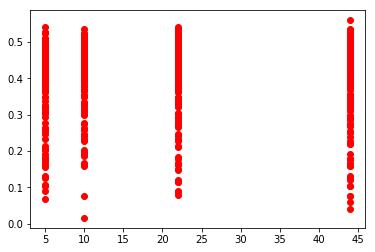

lookbackDistance OOS_SHARPE DIFFERENCE SLIPPAGE


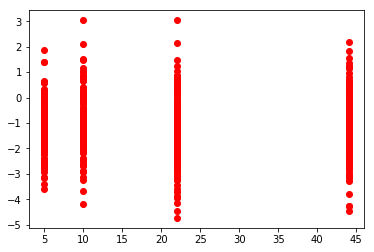

maxDistance
2.500000e-01    0.352415
5.000000e-01    0.348730
7.500000e-01    0.363682
1.000000e+00    0.416141
1.250000e+00    0.420836
1.500000e+00    0.417595
1.750000e+00    0.413331
2.000000e+00    0.444696
1.000000e+09    0.421314
Name: OOS_PROFITABILITY, dtype: float64
maxDistance
2.500000e-01   -0.862395
5.000000e-01   -1.252151
7.500000e-01   -1.414466
1.000000e+00   -1.081790
1.250000e+00   -1.031294
1.500000e+00   -1.087216
1.750000e+00   -1.038533
2.000000e+00   -0.929974
1.000000e+09   -1.081138
Name: OOS_SHARPE DIFFERENCE SLIPPAGE, dtype: float64
maxDistance OOS_PROFITABILITY


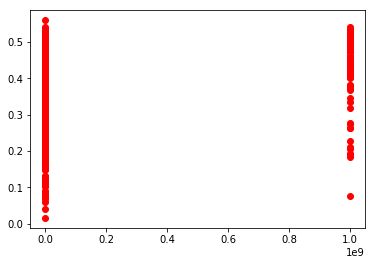

maxDistance OOS_SHARPE DIFFERENCE SLIPPAGE


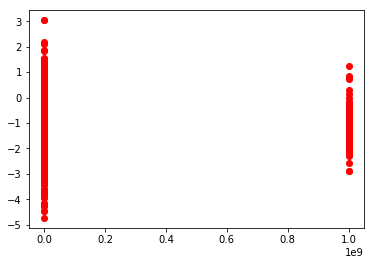

minConfidence
0.01    0.433909
0.05    0.441402
0.10    0.418623
0.20    0.388986
0.30    0.354947
Name: OOS_PROFITABILITY, dtype: float64
minConfidence
0.01   -1.004285
0.05   -1.329013
0.10   -1.024039
0.20   -1.099459
0.30   -1.004712
Name: OOS_SHARPE DIFFERENCE SLIPPAGE, dtype: float64
minConfidence OOS_PROFITABILITY


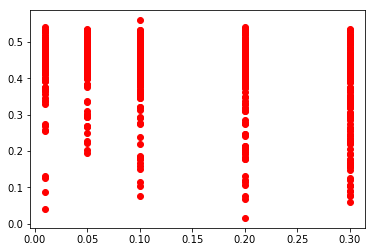

minConfidence OOS_SHARPE DIFFERENCE SLIPPAGE


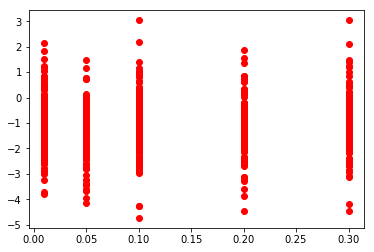

neighbors
1     0.452148
2     0.405049
3     0.404833
4     0.409874
5     0.422653
7     0.414286
10    0.406107
15    0.395895
20    0.382688
25    0.388704
30    0.362056
Name: OOS_PROFITABILITY, dtype: float64
neighbors
1    -1.061057
2    -1.306294
3    -1.458929
4    -1.039994
5    -0.936299
7    -1.193601
10   -0.924478
15   -1.073533
20   -0.794551
25   -1.169212
30   -0.959542
Name: OOS_SHARPE DIFFERENCE SLIPPAGE, dtype: float64
neighbors OOS_PROFITABILITY


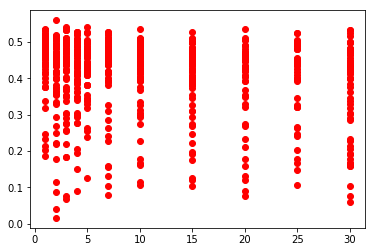

neighbors OOS_SHARPE DIFFERENCE SLIPPAGE


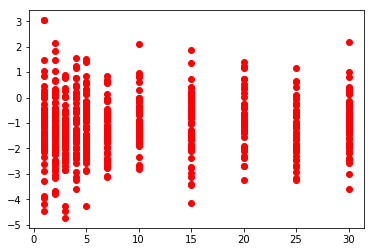

predictionLength
2     0.198413
3     0.371914
5     0.325160
7     0.407612
10    0.403646
15    0.434000
Name: OOS_PROFITABILITY, dtype: float64
predictionLength
2    -1.250676
3    -0.660098
5    -1.266352
7    -1.293796
10   -1.035635
15   -1.041588
Name: OOS_SHARPE DIFFERENCE SLIPPAGE, dtype: float64
predictionLength OOS_PROFITABILITY


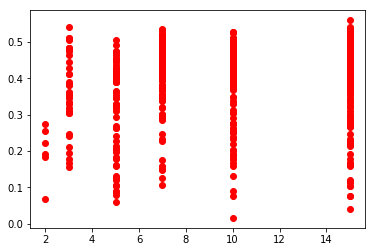

predictionLength OOS_SHARPE DIFFERENCE SLIPPAGE


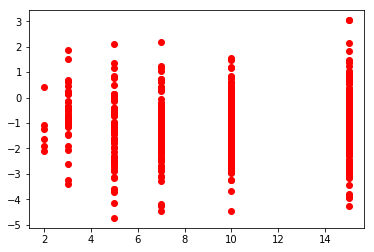

ticker OOS_PROFITABILITY


In [151]:
cm = pd.DataFrame(cleanedModels)
for col in cm.columns.values:
    
    try:
        import matplotlib.pyplot as plt
        groupsSharpe = cm.groupby([col])["OOS_PROFITABILITY"].mean()
        if len(groupsSharpe) < 20:
            print(groupsSharpe)
            print(cm.groupby([col])["OOS_SHARPE DIFFERENCE SLIPPAGE"].mean())
        print(col, "OOS_PROFITABILITY")
        xVals = cm[[col]].values
        yVals = cm[["OOS_PROFITABILITY"]].values
        plt.plot(xVals, yVals, 'ro')
        plt.show()
        print(col, "OOS_SHARPE DIFFERENCE SLIPPAGE")
        xVals = cm[[col]].values
        yVals = cm[["OOS_SHARPE DIFFERENCE SLIPPAGE"]].values
        plt.plot(xVals, yVals, 'ro')
        plt.show()
        plt.draw()
    except:
        continue
    



In [193]:
cm = pd.DataFrame(cleanedModels).dropna()
cmInput = cm[list(set(cm.columns.values) - set(["OOS_SHARPE DIFFERENCE", "IS_FACTOR SHARPE", "IS_RAW BETA",  "OOS_SHARPE", "OOS_SHARPE SLIPPAGE", "combiner", "ticker"]))]
cmOutput = cm[["OOS_SHARPE DIFFERENCE"]]

In [194]:
cmInput.columns

Index(['IS_EXTREME STABILITY', 'IS_ALPHA SLIPPAGE',
       'IS_25TH PERCENTILE SHARPE DIFFERENCE',
       'IS_RELATIVE SHARPE DIFFERENCE AVERAGE', 'IS_SHARPE', 'IS_TREYNOR',
       'numberOfPredictors', 'IS_SHARPE SLIPPAGE', 'IS_ANNUALIZED RETURN',
       'IS_TOTAL DAYS SEEN', 'IS_ROLLING SHARPE STABILITY',
       'IS_RELATIVE SHARPE', 'IS_SHARPE DIFFERENCE MIN',
       'IS_SMART INFORMATION RATIO', 'IS_ONE STD SHARPE',
       'IS_25TH PERCENTILE RELATIVE SHARPE DIFFERENCE',
       'IS_SHARPE DIFFERENCE SLIPPAGE', 'IS_SHARPE SLIPPAGE DECAY', 'IS_BETA',
       'IS_ACTIVITY', 'IS_25TH PERCENTILE SHARPE', 'predictionLength',
       'IS_STABILITY', 'IS_SHARPE DIFFERENCE AVERAGE', 'IS_SHARPE DIFFERENCE',
       'IS_RELATIVE SHARPE SLIPPAGE',
       'IS_RELATIVE SHARPE DIFFERENCE GREATER THAN 0',
       'IS_ROLLING SHARPE BETA', 'IS_SHARPE DIFFERENCE GREATER THAN 0',
       'IS_EXTREME STABILITY ROLLING 600', 'IS_ALPHA',
       'IS_RELATIVE SHARPE DIFFERENCE MIN', 'IS_ROLLING SHARPE ERROR',


In [195]:
cmInput

,IS_EXTREME STABILITY,IS_ALPHA SLIPPAGE,IS_25TH PERCENTILE SHARPE DIFFERENCE,IS_RELATIVE SHARPE DIFFERENCE AVERAGE,IS_SHARPE,IS_TREYNOR,numberOfPredictors,IS_SHARPE SLIPPAGE,IS_ANNUALIZED RETURN,IS_TOTAL DAYS SEEN,...,IS_SHARPE DIFFERENCE,IS_RELATIVE SHARPE SLIPPAGE,IS_RELATIVE SHARPE DIFFERENCE GREATER THAN 0,IS_ROLLING SHARPE BETA,IS_SHARPE DIFFERENCE GREATER THAN 0,IS_EXTREME STABILITY ROLLING 600,IS_ALPHA,IS_RELATIVE SHARPE DIFFERENCE MIN,IS_ROLLING SHARPE ERROR,IS_MIN ROLLING SHARPE
0,0.894353,0.024758,0.175650,0.675437,1.269128,-0.097305,2,0.724259,0.133477,1744,...,0.457949,-0.107153,0.878768,1.018918,0.878768,-0.950010,0.080945,-2.163291,0.895723,-0.354933
1,0.831139,0.006916,-0.695773,-0.129268,0.628492,0.048653,2,0.189506,0.096373,2037,...,0.186871,-0.570886,0.459686,0.387119,0.459686,-0.947509,0.081178,-18.496237,0.619889,-1.124320
2,0.948945,0.013766,-0.251761,0.272559,1.128318,-0.290330,2,0.500083,0.096603,2472,...,0.447959,-0.264972,0.639802,0.194975,0.639802,-0.973024,0.067065,-0.826170,0.490482,0.093114
3,0.900520,0.030273,0.188593,0.818705,0.956416,0.471542,2,0.551259,0.063255,1742,...,0.763158,1.852453,0.798122,0.330278,0.798122,-0.788347,0.057209,-1.470854,0.897204,-0.836832
4,0.568942,-0.033652,-1.167552,-0.388469,0.920025,-1.376700,2,-0.257625,0.098059,1948,...,0.096265,-1.312742,0.353565,0.391514,0.353565,-0.880023,0.093587,-1.600322,0.675868,-0.996843
5,0.966962,-0.125269,-0.560736,-0.211856,0.913847,-0.181762,2,-0.277751,0.131777,1876,...,-0.126452,-1.266991,0.372923,0.330115,0.372923,-0.934339,0.049775,-5.116117,0.793027,-0.868487
6,0.900418,-0.005503,-0.856553,-0.394172,0.816747,-3.541779,2,0.333819,0.022518,1875,...,-0.425210,-0.731215,0.308498,0.267199,0.308498,-0.964373,0.007951,-2.673433,0.862157,-0.405936
7,0.830910,0.025786,-0.467776,-0.144367,0.782197,0.138114,2,0.318984,0.111503,2037,...,0.340576,-0.277697,0.403135,0.581515,0.403135,-0.958367,0.094991,-15.517465,0.782112,-0.734206
8,0.885403,-0.072214,-0.667763,-0.115201,0.828277,-0.203998,2,-0.015408,0.115194,1853,...,-0.060225,-1.017342,0.443196,0.737172,0.443196,-0.930605,0.049284,-25.866522,0.791972,-1.370281
9,0.578649,-0.141544,-0.777884,-0.103535,0.942719,-0.018704,2,-13.449209,0.005750,1850,...,-0.000803,-15.254259,0.428393,1.085181,0.428393,-0.934085,0.003834,-4.605931,0.985889,-1.259068


In [196]:
len(cmOutput[cmOutput > 0].dropna())/len(cmOutput.dropna())

0.3185404339250493

In [197]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [207]:
cmOutput

,OOS_SHARPE DIFFERENCE
0,-0.389076
1,-0.555811
2,0.639304
3,-0.084324
4,0.130381
5,-0.179134
6,-0.011525
7,-0.173473
8,-0.221728
9,1.328103


In [203]:
dtreg = DecisionTreeRegressor(min_samples_leaf=30).fit(cmInput[:750], cmOutput[:750])

In [204]:
tree.export_graphviz(dtreg, out_file='tree.dot')

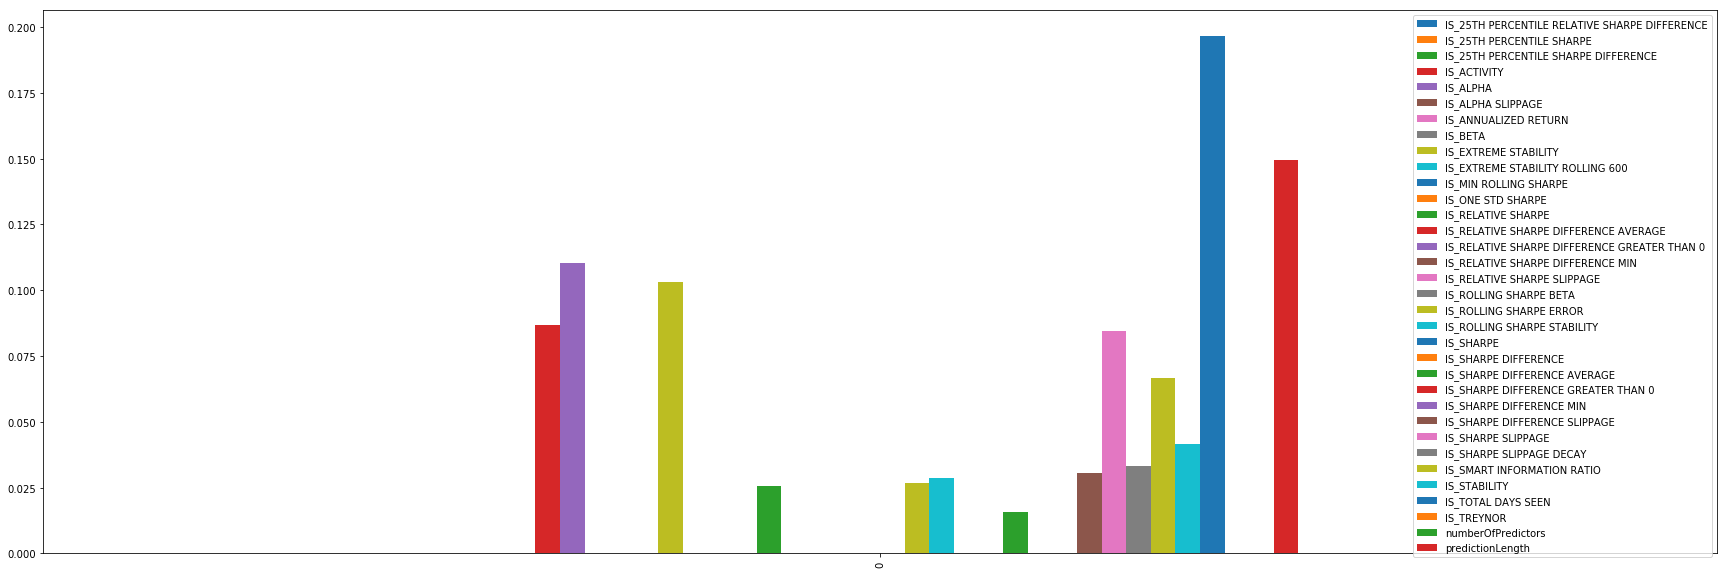

In [205]:
mapper = {}
for i in range(len(cmInput.columns)):
    mapper[cmInput.columns[i]] = dtreg.feature_importances_[i]
%matplotlib inline
pd.DataFrame([mapper]).plot.bar(figsize=(30,10))

In [208]:
pd.DataFrame(dtreg.predict(cmInput[750:]), index=cmOutput[750:].index, columns=["Predicted OOS_SHARPE DIFFERENCE"]).join(cmOutput[750:])

,Predicted OOS_SHARPE DIFFERENCE,OOS_SHARPE DIFFERENCE
751,-0.985127,-0.093945
752,0.239407,0.511387
753,0.239407,0.324767
754,-0.008772,0.716352
755,-0.423803,0.332160
756,0.078780,0.571654
757,-0.389904,0.338736
758,-0.985127,-1.035398
759,0.015560,0.228423
760,-1.334179,-1.683748
